# Most Frequent Test Hundred Scorers

Analyse which batters scored test hundreds most frequently using data from [ESPNcricinfo Statsguru](https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=hundreds;size=200;template=results;type=batting).

## Step 1 – Parse the "Most Hundreds" table into a DataFrame

In [1]:
import pandas as pd
from curl_cffi.requests import get
from io import StringIO

PAGE_SIZE = 100

url = f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=hundreds;template=results;type=batting;size={PAGE_SIZE}"

html = get(url, impersonate="chrome").text

# The main data table is the 3rd <table> on the page (index 2)
df = pd.read_html(StringIO(html))[2]

# Clean up column names and drop any "Unnamed" columns
df.columns = df.columns.str.strip()
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]

# Use 1-based index
df.index = range(1, len(df) + 1)

print(f"Loaded {len(df)} rows, {len(df.columns)} columns")
print("Columns:", list(df.columns))

Loaded 100 rows, 11 columns
Columns: ['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', '100', '50', '0']


## Step 2 – Display the DataFrame

In [2]:
pd.set_option("display.max_rows", None)
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
1,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,51,68,14
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
4,JE Root (ENG),2012-2026,163,298,25,13943,262,51.07,41,66,15
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.40,38,52,11
6,SPD Smith (AUS),2010-2026,123,220,28,10763,239,56.05,37,44,11
7,R Dravid (ICC/IND),1996-2012,164,286,32,13288,270,52.31,36,63,8
8,SM Gavaskar (IND),1971-1987,125,214,16,10122,236*,51.12,34,45,12
9,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15
10,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17


## Step 3 – Add "Innings per Hundred" column

Formula: **(Inns − NO) / 100s**

A lower value means the batter reaches a hundred more frequently.

In [3]:
df["inns_per_100"] = ((df["Inns"] - df["NO"]) / df["100"]).round(2)

print("Column added ✓")

Column added ✓


## Step 4 – Flag recent players

A player is considered **recent** if their Span includes the current year (2026) or the previous year (2025).

In [4]:
from datetime import date

current_year = date.today().year
df["recent_player"] = df["Span"].str.contains(f"{current_year}|{current_year - 1}", regex=True)

print(f"Recent players (Span includes {current_year - 1} or {current_year}): {df['recent_player'].sum()}")

Recent players (Span includes 2025 or 2026): 10


## Step 5 – Display sorted by Innings per Hundred (most frequent first)

In [5]:
df = df.sort_values("inns_per_100", ascending=True).reset_index(drop=True)
df.index = range(1, len(df) + 1)
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,inns_per_100,recent_player
1,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,29,13,7,2.41,False
2,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,15,14,1,4.47,False
3,H Sutcliffe (ENG),1924-1935,54,84,9,4555,194,60.73,16,23,2,4.69,False
4,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,15,19,6,5.07,False
5,SPD Smith (AUS),2010-2026,123,220,28,10763,239,56.05,37,44,11,5.19,True
6,KS Williamson (NZ),2010-2025,108,192,19,9461,251,54.68,33,38,11,5.24,True
7,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,5.33,False
8,GS Sobers (WI),1954-1974,93,160,21,8032,365*,57.78,26,30,12,5.35,False
9,GS Chappell (AUS),1970-1984,87,151,19,7110,247*,53.86,24,31,12,5.50,False
10,WR Hammond (ENG),1927-1947,85,140,16,7249,336*,58.45,22,24,4,5.64,False


## Step 6 – Scatter plot: Hundreds vs Innings per Hundred

Each dot is a player. **Recent players** (Span includes 2025 or 2026) are highlighted in a different colour. Players closer to the bottom-right scored many hundreds *and* did so frequently.

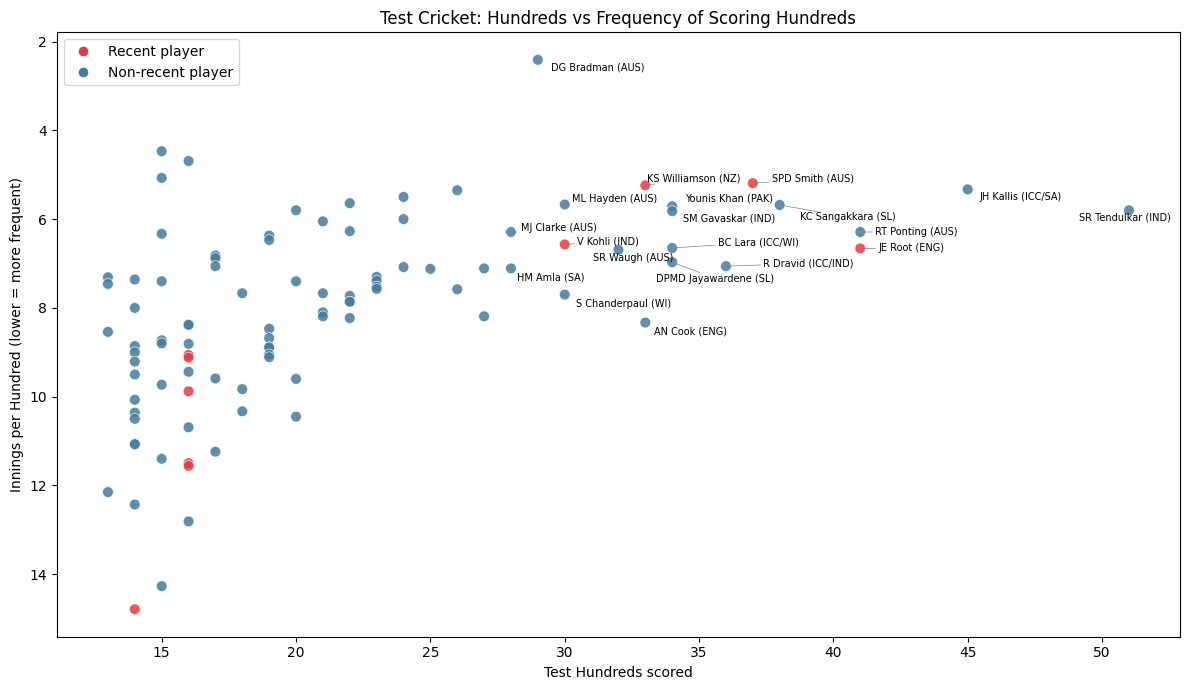

In [6]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(12, 7))

colors = df["recent_player"].map({True: "#e63946", False: "#457b9d"})

ax.scatter(df["100"], df["inns_per_100"], c=colors, s=60, edgecolors="white", linewidth=0.5, alpha=0.85)

# Label a few notable players (top-20 by most hundreds)
texts = []
for _, row in df.nlargest(20, "100").iterrows():
    texts.append(ax.text(row["100"], row["inns_per_100"], row["Player"], fontsize=7))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

ax.set_xlabel("Test Hundreds scored")
ax.set_ylabel("Innings per Hundred (lower = more frequent)")
ax.set_title("Test Cricket: Hundreds vs Frequency of Scoring Hundreds")
ax.invert_yaxis()

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#e63946", markersize=8, label="Recent player"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#457b9d", markersize=8, label="Non-recent player"),
]
ax.legend(handles=legend_elements, loc="upper left")

plt.tight_layout()
plt.show()